Follow the steps at: https://xds-dev.ecmwf.int/how-to-api
I would recommend saving in "\~/.cdsapirc_xds_dev" rather than "\~/.cdsapirc" so as not to disrupt any CDS credentials you might have set up.

In [8]:
# pip install "cdsapi>=0.7.4" h5netcdf

In [16]:
import yaml
from pathlib import Path
from zipfile import ZipFile
import xarray as xr
from cartopy import crs as ccrs, feature as cfeat
from matplotlib import pyplot as plt

with open(Path("~/.cdsapirc_xds_dev").expanduser(), "r") as f:
    credentials = yaml.safe_load(f)

In [17]:
import cdsapi

dataset = "ad4gd-air-quality"
request = {
    "variable": ["particulate_matter_d_2_5_µm"],
    "month": ["10"],
    "day": ["01"],
    "area": [55.91, -4.4, 42.22, 14.65],
}

client = cdsapi.Client(**credentials)
filename = client.retrieve(dataset, request).download()

2025-04-11 09:30:28,259 INFO Request ID is 1dc49121-1ca9-4064-8caf-eb7dc440baa4
2025-04-11 09:30:28,426 INFO status has been updated to accepted
2025-04-11 09:30:29,614 INFO status has been updated to successful


<xarray.Dataset> Size: 106MB
Dimensions:  (time: 24, lat: 871, lon: 1265)
Coordinates:
  * lat      (lat) float64 7kB 46.51 46.52 46.52 46.53 ... 55.18 55.19 55.2
  * lon      (lon) float64 10kB 2.005 2.015 2.025 2.035 ... 14.62 14.63 14.64
  * time     (time) datetime64[ns] 192B 2024-10-01 ... 2024-10-01T23:00:00
Data variables:
    pm2p5    (time, lat, lon) float32 106MB 4.716 4.713 4.711 ... nan nan nan
Attributes:
    title:        PM2.5 mass concentration
    Conventions:  CF-1.8
    institution:  AD4GD
    source:       IoT sensor network
    history:      Created 2025-04-09 13:06:07.088825
    summary:      A high resolution dataset for particulate matter (PM2.5 and...
    license:      The dataset is distributed under the Licence to Use Coperni...
    references:   https://doi.org/10.5281/zenodo.10839023

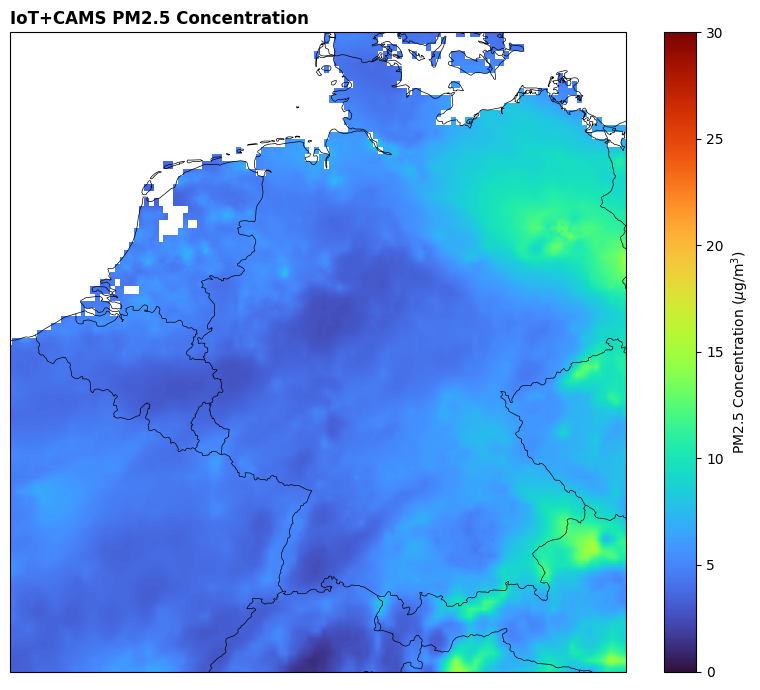

In [18]:
def plot(ds):
    mods = ds.mean('time')
    data_var = list(mods.data_vars)[0]
    data = mods[data_var]
     
    fig = plt.figure(figsize=(8, 7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_aspect('auto')
    cm = ax.pcolormesh(mods.lon, mods.lat, data, vmin=0, vmax=30,
                       cmap='turbo', transform=ccrs.PlateCarree())
    plt.colorbar(cm, ax=ax, label=r'PM2.5 Concentration ($\mu$g/m$^3$)')
    ax.coastlines('10m', lw=0.5)
    ax.add_feature(cfeat.BORDERS, lw=0.5)
    ax.set_title('IoT+CAMS PM2.5 Concentration', fontweight='bold', loc='left')
    plt.tight_layout()

with ZipFile('2afc6e939f918a9e634e7da3d9ca3dc.zip') as myzip:
    for file_info in myzip.infolist():
        with myzip.open(file_info) as f:
            ds = xr.open_dataset(f, engine="h5netcdf")
            plot(ds)
        break

ds